In [57]:
import pandas as pd
import numpy as np

data = '../data/iris.csv'
irisDF = pd.read_csv(data)

featureDF = irisDF[irisDF.columns[2:4]][:100]
targerSR = irisDF.species[:100]
featureDF.shape, targerSR.shape

((100, 2), (100,))

In [58]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targerSR,
                                                    stratify=targerSR,
                                                    random_state=7)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(x_test)

In [60]:
scaled_X_train

array([[ 0.74110139,  1.10632286],
       [-0.93055588, -1.19360207],
       [ 0.74110139,  0.57557096],
       [-1.00020827, -0.83976746],
       [ 1.01971094,  0.92940556],
       [-1.13951304, -1.01668476],
       [ 0.88040616,  0.92940556],
       [-0.93055588, -0.66285016],
       [ 1.08936332,  1.10632286],
       [-0.93055588, -1.01668476],
       [-1.06986065, -0.83976746],
       [ 0.95005855,  1.28324016],
       [-0.86090349, -1.01668476],
       [-1.06986065, -0.83976746],
       [ 1.08936332,  0.75248826],
       [-0.86090349, -0.30901555],
       [-1.00020827, -1.01668476],
       [-0.93055588, -1.19360207],
       [ 1.08936332,  0.92940556],
       [-1.06986065, -1.01668476],
       [ 1.43762525,  1.28324016],
       [ 1.36797287,  1.10632286],
       [-0.86090349, -1.01668476],
       [-1.00020827, -1.01668476],
       [-0.93055588, -0.66285016],
       [ 1.50727764,  1.63707477],
       [-0.93055588, -1.19360207],
       [-0.86090349, -1.01668476],
       [-0.93055588,

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_error


model = SVC(kernel='linear')
model.fit(scaled_X_train, y_train)
# print(f'classes_ : {model.classes_}')
# print(f'{model._get_param_names()}')
train_score = model.score(scaled_X_train, y_train)
test_score = model.score(scaled_x_test, y_test)

print(f'Train score : {train_score:.3f}, Test score : {test_score:.3f} ',end='')

y_pred = model.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred)
# accuracyList.append(accuracy)

# 결과 출력
print(f"{accuracy:.4f}")
print(f'model.coef_ : {model.coef_}, model.intercept_ : {model.intercept_}')


Train score : 1.000, Test score : 1.000 1.0000
model.coef_ : [[1.02681832 0.94084931]], model.intercept_ : [0.29307257]


In [62]:
scaled_X_train

array([[ 0.74110139,  1.10632286],
       [-0.93055588, -1.19360207],
       [ 0.74110139,  0.57557096],
       [-1.00020827, -0.83976746],
       [ 1.01971094,  0.92940556],
       [-1.13951304, -1.01668476],
       [ 0.88040616,  0.92940556],
       [-0.93055588, -0.66285016],
       [ 1.08936332,  1.10632286],
       [-0.93055588, -1.01668476],
       [-1.06986065, -0.83976746],
       [ 0.95005855,  1.28324016],
       [-0.86090349, -1.01668476],
       [-1.06986065, -0.83976746],
       [ 1.08936332,  0.75248826],
       [-0.86090349, -0.30901555],
       [-1.00020827, -1.01668476],
       [-0.93055588, -1.19360207],
       [ 1.08936332,  0.92940556],
       [-1.06986065, -1.01668476],
       [ 1.43762525,  1.28324016],
       [ 1.36797287,  1.10632286],
       [-0.86090349, -1.01668476],
       [-1.00020827, -1.01668476],
       [-0.93055588, -0.66285016],
       [ 1.50727764,  1.63707477],
       [-0.93055588, -1.19360207],
       [-0.86090349, -1.01668476],
       [-0.93055588,

In [63]:
# 결정 경계 그리기

c = model.intercept_
a = model.coef_[0][0]
b = model.coef_[0][1]
w = -(a/ b)

xx = scaled_X_train[:, 0]
yy = (w * scaled_X_train[:, 0] - c/b)
# w * xtrain[:, 0] - c/b)

margin = 1 / np.sqrt(a**2 + b**2)
print(margin)
# margin1 = 1 / np.sqrt(np.sum(model.coef_ ** 2)) #분산 
# print(margin1)
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin



0.7180408338445293


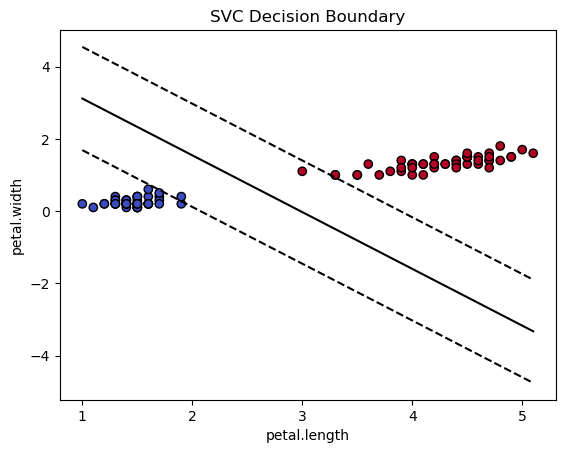

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC



X = np.array(featureDF)
y = targerSR.T.replace({"setosa":0, "versicolor":1})

# SVC 모델 생성
svc_model = SVC(kernel='linear')
svc_model.fit(X, y)

# 결정 경계 그리기
w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svc_model.intercept_[0]) / w[1]

# Support vectors
margin = 1 / np.sqrt(np.sum(svc_model.coef_ ** 2)) #분산 
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--') # 점선
plt.plot(xx, yy_up, 'k--') # 점선 

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
# plt.ylim(-0.5,2)
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.title('SVC Decision Boundary')
plt.show()

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = '../data/HousingData.csv'
houseDF = pd.read_csv(data)

houseDF = houseDF.dropna()
houseDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [66]:
featureDF = houseDF[['LSTAT','RM','PTRATIO','INDUS','TAX']]
targetSR = houseDF[houseDF.columns[-1]]

In [67]:
featureDF

,LSTAT,RM,PTRATIO,INDUS,TAX
0,4.98,6.575,15.3,2.31,296
1,9.14,6.421,17.8,7.07,242
2,4.03,7.185,17.8,7.07,242
3,2.94,6.998,18.7,2.18,222
5,5.21,6.430,18.7,2.18,222
...,...,...,...,...,...
499,15.10,5.569,19.2,9.69,391
500,14.33,6.027,19.2,9.69,391
502,9.08,6.120,21.0,11.93,273
503,5.64,6.976,21.0,11.93,273


In [68]:
targetSR

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [69]:
X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=6)

In [70]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(x_test)

In [71]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(scaled_X_train, y_train)
model.score(scaled_X_train,y_train), model.score(scaled_x_test, y_test)

(1.0, 0.8265841316674167)

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param = {
    # 'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 11),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 11),
    # 'min_weight_fraction_leaf' : range(0,1),
    'max_features': ["sqrt", "log2", 1, 2, 3],
    # 'max_leaf_nodes' : range(1,5),
    # 'min_impurity_decrese' : range(0,10),
    # 'class_weight' : [None, 'balanced'],
    # 'ccp_alpha' : range(0,10)
    # 'monotonic_cst' : 
         }

gridcv = GridSearchCV(model, param_grid=param,return_train_score=True)
gridcv.fit(scaled_X_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 11),
                         'max_features': ['sqrt', 'log2', 1, 2, 3],
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 21)},
             return_train_score=True)

In [73]:
best_model = gridcv.best_estimator_
best_params = gridcv.best_params_
print("Best model:", best_model)
print("Best parameters:", best_params)

Best model: DecisionTreeRegressor(max_depth=6, max_features=3)
Best parameters: {'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [74]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pre = model.predict(scaled_x_test)
r2 = r2_score(y_test, y_pre)
mse = mean_squared_error(y_test, y_pre)
mae = mean_absolute_error(y_test, y_pre)
rmse = mean_squared_error(y_test, y_pre, squared=False)
print(f'''\nR2 : {r2:.3f}\nMAE : {mae:.3f}\nMSE : {mse:.3f}\nRMSE : {rmse:.3f}''')


R2 : 0.827
MAE : 2.662
MSE : 13.721
RMSE : 3.704


In [75]:
c =0
for b in best_model.feature_importances_:
    c +=b
print(c)

1.0


Feature: RM | Importance: 0.661
Feature: LSTAT | Importance: 0.164
Feature: PTRATIO | Importance: 0.136
Feature: INDUS | Importance: 0.024
Feature: TAX | Importance: 0.016


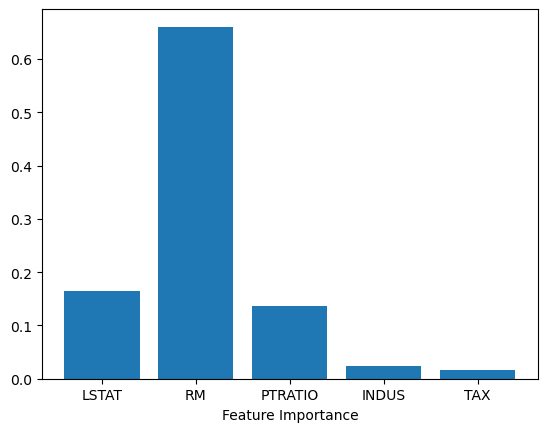

In [80]:
scaled_X_train = pd.DataFrame(scaled_X_train)

feature_importances = best_model.feature_importances_

for feature, importance in sorted(zip(featureDF.columns, feature_importances), key=lambda x: x[1], reverse=True):
    print(f"Feature: {feature} | Importance: {importance:.3f}")

plt.bar(featureDF.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.show()